# EVALUATION FOR DUAL-CLASSIFIERS APPROACH
## ========= 10-CLASS FORMAT =========

- Evaluate predictions from dual-classifiers approach - binary classifier predictions and multi-label classifier predictions

In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [10]:
###### USER TO UPDATE ######

# COMBINED PREDICTIONS IN .pkl FROM BINARY AND MULTI-LABEL CLASSIFIERS
# COMBINED PREDICTIONS IN .pkl FROM BINARY AND MULTI-LABEL CLASSIFIERS
#combined_pred_file = '../predictions/jenia_test_newINS_FP_fixed_pred.pkl'
# combined_pred_file = '../predictions/jenia_test_newINS_FP_fixed_pred.pkl'
# combined_pred_file = 'combined_test_new_INS_fixed_FP_pred.pkl'
combined_pred_file = 'test_aug_ai_pred_reorder_newgolds_updated.pkl'
#combined_pred_file = '../predictions/all_data_10.pkl'
pred_col_j = 'pred_medroberta_18cats'

In [11]:
df_comb = pd.read_pickle(combined_pred_file)

In [12]:
df_comb.columns

Index(['pad_sen_id', 'year', 'NotitieID', 'batch', 'annotator',
       'source_dataset', 'background_sent', 'target_sent', 'text_raw', 'text',
       'categories_18', 'labels_9', 'labels_10', 'pred_medroberta_18cats',
       'confidence_medroberta_18cats', 'labels_18'],
      dtype='object')

In [ ]:
pred_categories_18 = [
    "B1300 Energy level", "B140 Attention functions", "B152 Emotional functions",
    "B440 Respiration functions", "B455 Exercise tolerance functions", "B530 Weight maintenance functions",
    "D450 Walking", "D550 Eating", "D840-D859 Work and employment", "B280 Sensations of pain",
    "B134 Sleep functions", "D760 Family relationships", "B164 Higher-level cognitive functions",
    "D465 Moving around using equipment", "D410 Changing basic body position",
    "B230 Hearing functions", "D240 Handling stress and other psychological demands", "None"
]

# Gold label 10-category order from your test set:
gold_categories_10 = [
    "B1300 Energy level", "B140 Attention functions", "B152 Emotional functions",
    "B440 Respiration functions", "B455 Exercise tolerance functions", "B530 Weight maintenance functions",
    "D450 Walking", "D550 Eating", "D840-D859 Work and employment", "None"
]

# Create index mapping: gold index → prediction index
gold_to_pred_idx = [pred_categories_18.index(cat) for cat in gold_categories_10]

# Reorder predicted labels
df_comb['pred_10'] = df_comb['pred_medroberta_18cats'].apply(
    lambda x: [x[i] for i in gold_to_pred_idx]
)

# Match gold labels
df_comb['true_10'] = df_comb['labels_10']

In [13]:
# # Your prediction 18-category order:
# pred_categories_18 = [
#     "B1300 Energy level", "B140 Attention functions", "B152 Emotional functions",
#     "B440 Respiration functions", "B455 Exercise tolerance functions", "B530 Weight maintenance functions",
#     "D450 Walking", "D550 Eating", "D840-D859 Work and employment", "B280 Sensations of pain",
#     "B134 Sleep functions", "D760 Family relationships", "B164 Higher-level cognitive functions",
#     "D465 Moving around using equipment", "D410 Changing basic body position",
#     "B230 Hearing functions", "D240 Handling stress and other psychological demands", "None"
# ]

# # Gold label 10-category order from your test set:
# gold_categories_10 = [
#     "B440 Respiration functions", "B140 Attention functions", "D840-D859 Work and employment",
#     "B1300 Energy level", "D550 Eating", "D450 Walking", "B455 Exercise tolerance functions",
#     "B530 Weight maintenance functions", "B152 Emotional functions", "None"
# ]

# # Create index mapping: gold index → prediction index
# gold_to_pred_idx = [pred_categories_18.index(cat) for cat in gold_categories_10]

# # Reorder predicted labels
# df_comb['pred_10'] = df_comb['pred_medroberta_18cats'].apply(
#     lambda x: [x[i] for i in gold_to_pred_idx]
# )

# # Match gold labels
# df_comb['true_10'] = df_comb['labels_10']

In [13]:
# IF 18-cat gold labels completed

df_comb['pred_18'] = df_comb[pred_col_j]
df_comb['true_18'] = df_comb['labels_18']

In [14]:
df_comb['pred_18'] = df_comb['pred_18'].apply(lambda x: ast.literal_eval(str(x)) if isinstance(x, str) else x)
df_comb['true_18'] = df_comb['true_18'].apply(lambda x: ast.literal_eval(str(x)) if isinstance(x, str) else x)

In [16]:
# # IF 10-cat model

# df_comb['pred_10'] = df_comb[pred_col_j]
# df_comb['true_10'] = df_comb['labels_10']

In [7]:
# # IF 9-cat model

# def generate_pred_10(pred_vector):
#     return pred_vector + [1] if sum(pred_vector) == 0 else pred_vector + [0]
# #df_comb['pred_10'] = df_comb[pred_col_j].apply(generate_pred_10)
# df_comb['true_10'] = df_comb['labels_9'].apply(generate_pred_10)

In [46]:
#df_red = df_comb[['text', 'true_10', 'pred_10', 'source_dataset']]

# df['pred_10'] = df['pred_jenia_new_INS'].apply(generate_pred_10)

# pd.set_option('display.max_colwidth', None)

# df_conf = df
# df_INS_conf = df_conf[df_conf['pred_INS'] ==1]['INS_confidence']

In [15]:
# CREATE CLASSIFICATION REPORT FOR MULTI-LABEL PREDICTIONS 

df = df_comb
#df['pred_10'] = df['pred_jenia_new_INS'].apply(generate_pred_10)

icf_true = df['true_18'].tolist()
icf_pred = df['pred_18'].tolist()

# cat = ['ADM', 'ATT', 'BER', 'ENR', 'ETN', 'FAC', 'INS', 'MBW', 'STM', 'none']
cat = ['B1300', 'B140', 'B152', 'B440', 'B455', 'B530', 'D450', 'D550', 'D840-D859', 'B280', 'B134', 'D760', 'B164', 'D465', 'D410', 'B230', 'D240', 'None']

# Convert lists of lists into numpy arrays (shape: [n_samples, n_classes])
y_true = np.array(icf_true)
y_pred = np.array(icf_pred)

# Define the label indices explicitly
label_indices = list(range(len(cat)))  # [0, 1, 2, ..., 17]

# Now generate the classification report
report_icf_dict = classification_report(
    y_true,
    y_pred,
    labels=label_indices,
    target_names=cat,
    output_dict=True,
    zero_division=0
)

df_report_icf = pd.DataFrame(report_icf_dict).round(2)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


print(df_report_icf)

# report_icf = classification_report (icf_true, icf_pred, target_names = cat)
# print("====== COMBINED classification report: ====== \n", report_icf)
# print()

# report_icf_dict = classification_report (icf_true, icf_pred, target_names = cat, output_dict = True)
# df_report_icf = pd.DataFrame(report_icf_dict).round(2)

# print("Combined predictions output file: ", combined_pred_file)
# print()
# print("====== COMBINED (binary + icf) classification report in df: ====== \n",df_report_icf)
# print()

# report_latex = df_report_icf.to_latex(float_format="%.2f")
# print("====== COMBINED classification report in latex: ====== \n",report_latex)

df_report_icf
# OUTPUT FILE: '../data/output/combined_b1_e4_output_vm11_dev-gpt-anon_test-jenia-pos-neg.pkl'

            B1300   B140    B152     B440    B455    B530    D450    D550  \
precision    0.83   0.89    0.66     0.85    0.40    0.78    0.63    0.61   
recall       0.63   0.66    0.70     0.65    0.34    0.69    0.80    0.65   
f1-score     0.72   0.76    0.68     0.73    0.36    0.73    0.71    0.63   
support    448.00  64.00  362.00  1060.00  398.00  338.00  368.00  665.00   

           D840-D859    B280    B134    D760    B164    D465    D410   B230  \
precision       0.67    0.83    0.61    0.54    0.73    0.55    0.59   0.33   
recall          0.48    0.93    0.91    0.92    0.75    0.79    0.68   0.92   
f1-score        0.56    0.88    0.73    0.68    0.74    0.65    0.63   0.49   
support       342.00  847.00  183.00  472.00  303.00  162.00  390.00  37.00   

             D240      None  micro avg  macro avg  weighted avg  samples avg  
precision    0.53      0.97       0.92       0.67          0.92         0.89  
recall       0.77      0.92       0.88       0.73          0

,B1300,B140,B152,B440,B455,B530,D450,D550,D840-D859,B280,B134,D760,B164,D465,D410,B230,D240,None,micro avg,macro avg,weighted avg,samples avg
precision,0.83,0.89,0.66,0.85,0.40,0.78,0.63,0.61,0.67,0.83,0.61,0.54,0.73,0.55,0.59,0.33,0.53,0.97,0.92,0.67,0.92,0.89
recall,0.63,0.66,0.70,0.65,0.34,0.69,0.80,0.65,0.48,0.93,0.91,0.92,0.75,0.79,0.68,0.92,0.77,0.92,0.88,0.73,0.88,0.89
f1-score,0.72,0.76,0.68,0.73,0.36,0.73,0.71,0.63,0.56,0.88,0.73,0.68,0.74,0.65,0.63,0.49,0.63,0.95,0.90,0.68,0.90,0.89
support,448.00,64.00,362.00,1060.00,398.00,338.00,368.00,665.00,342.00,847.00,183.00,472.00,303.00,162.00,390.00,37.00,212.00,31692.00,38343.00,38343.00,38343.00,38343.00


In [11]:
# CREATE CONFUSION MATRIX WITH MULTI-LABEL PREDICTIONS
df = df_comb

In [16]:
df = df_comb

# cat = ['ADM', 'ATT', 'BER', 'ENR', 'ETN', 'FAC', 'INS', 'MBW', 'STM', 'none']
cat = ['B1300', 'B140', 'B152', 'B440', 'B455', 'B530', 'D450', 'D550', 'D840-D859', 'B280', 'B134', 'D760', 'B164', 'D465', 'D410', 'B230', 'D240', 'None']
pred_cat = ['pred_B1300', 'pred_B140', 'pred_B152', 'pred_B440', 'pred_B455', 'pred_B530', 'pred_D450', 'pred_D550', 'pred_D840-D859', 'pred_B280', 'pred_B134', 
       'pred_D760', 'pred_B164', 'pred_D465', 'pred_D410', 'pred_B230', 'pred_D240', 'pred_None']
# pred_cat = ['pred_ADM', 'pred_ATT', 'pred_BER', 'pred_ENR', 'pred_ETN', 'pred_FAC', 'pred_INS', 'pred_MBW', 'pred_STM', 'pred_none']


# for column in cat + pred_cat:
#     df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0).astype(int)

df[cat] = pd.DataFrame(df.true_18.tolist(), index= df.index)
df[pred_cat] = pd.DataFrame(df.pred_18.tolist(), index= df.index)

y_true = df[cat].values
y_pred = df[pred_cat].values

#mcm = multilabel_confusion_matrix(y_true, y_pred)
np.set_printoptions(threshold=np.inf)

df_cm = pd.DataFrame(0, index=cat, columns=cat)

for true_idx, true_label in enumerate(cat):
    for pred_idx, pred_label in enumerate(cat):
        if true_label == pred_label:
            df_cm.loc[true_label, pred_label] = np.sum((y_true[:, true_idx] == 1) & (y_pred[:, pred_idx] == 1))
        else:
            df_cm.loc[true_label, pred_label] = np.sum((y_true[:, true_idx] == 1) & (y_pred[:, pred_idx] == 1))


df_cm.columns = pd.MultiIndex.from_tuples([('PREDICT', col) for col in df_cm.columns])
df_cm.index = pd.MultiIndex.from_tuples([('TRUE', idx) for idx in df_cm.index])

# df_cm.style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])]).background_gradient(cmap='Greens')

styled_cm = df_cm.style.set_properties(**{
    'text-align': 'center'
}).set_table_styles([
    dict(selector='th.col_heading.level0', props=[('text-align', 'center')]),
    dict(selector='th.row_heading.level0', props=[('text-align', 'center'), ('transform', 'rotate(270deg)'), ('vertical-align', 'middle')]),
    dict(selector='th.row_heading.level1', props=[('text-align', 'right')])
]).background_gradient(cmap='Greens')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(df_report_icf)
styled_cm                                                                                                                                      
                                                                                 
# df_cm.style.background_gradient(cmap='Greens')

            B1300   B140    B152     B440    B455    B530    D450    D550  \
precision    0.83   0.89    0.66     0.85    0.40    0.78    0.63    0.61   
recall       0.63   0.66    0.70     0.65    0.34    0.69    0.80    0.65   
f1-score     0.72   0.76    0.68     0.73    0.36    0.73    0.71    0.63   
support    448.00  64.00  362.00  1060.00  398.00  338.00  368.00  665.00   

           D840-D859    B280    B134    D760    B164    D465    D410   B230  \
precision       0.67    0.83    0.61    0.54    0.73    0.55    0.59   0.33   
recall          0.48    0.93    0.91    0.92    0.75    0.79    0.68   0.92   
f1-score        0.56    0.88    0.73    0.68    0.74    0.65    0.63   0.49   
support       342.00  847.00  183.00  472.00  303.00  162.00  390.00  37.00   

             D240      None  micro avg  macro avg  weighted avg  samples avg  
precision    0.53      0.97       0.92       0.67          0.92         0.89  
recall       0.77      0.92       0.88       0.73          0

# notes: 2969

=== NOTE-LEVEL CLASSIFICATION REPORT (18 cats) ===
            B1300   B140    B152    B440    B455    B530    D450    D550  \
precision    0.86   0.93    0.75    0.85    0.48    0.95    0.59    0.84   
recall       0.70   0.76    0.76    0.88    0.47    0.82    0.88    0.82   
f1-score     0.77   0.84    0.76    0.87    0.48    0.88    0.71    0.83   
support    339.00  51.00  232.00  397.00  276.00  212.00  184.00  309.00   

           D840-D859    B280    B134    D760    B164    D465    D410   B230  \
precision       0.77    0.89    0.70    0.69    0.78    0.64    0.69   0.32   
recall          0.56    0.96    0.94    0.97    0.80    0.79    0.78   0.91   
f1-score        0.65    0.92    0.80    0.81    0.79    0.71    0.73   0.48   
support       268.00  457.00  132.00  274.00  143.00  111.00  201.00  22.00   

             D240     None  micro avg  macro avg  weighted avg  samples avg  
precision    0.64     0.94       0.80       0.74          0.82         0.82  
r

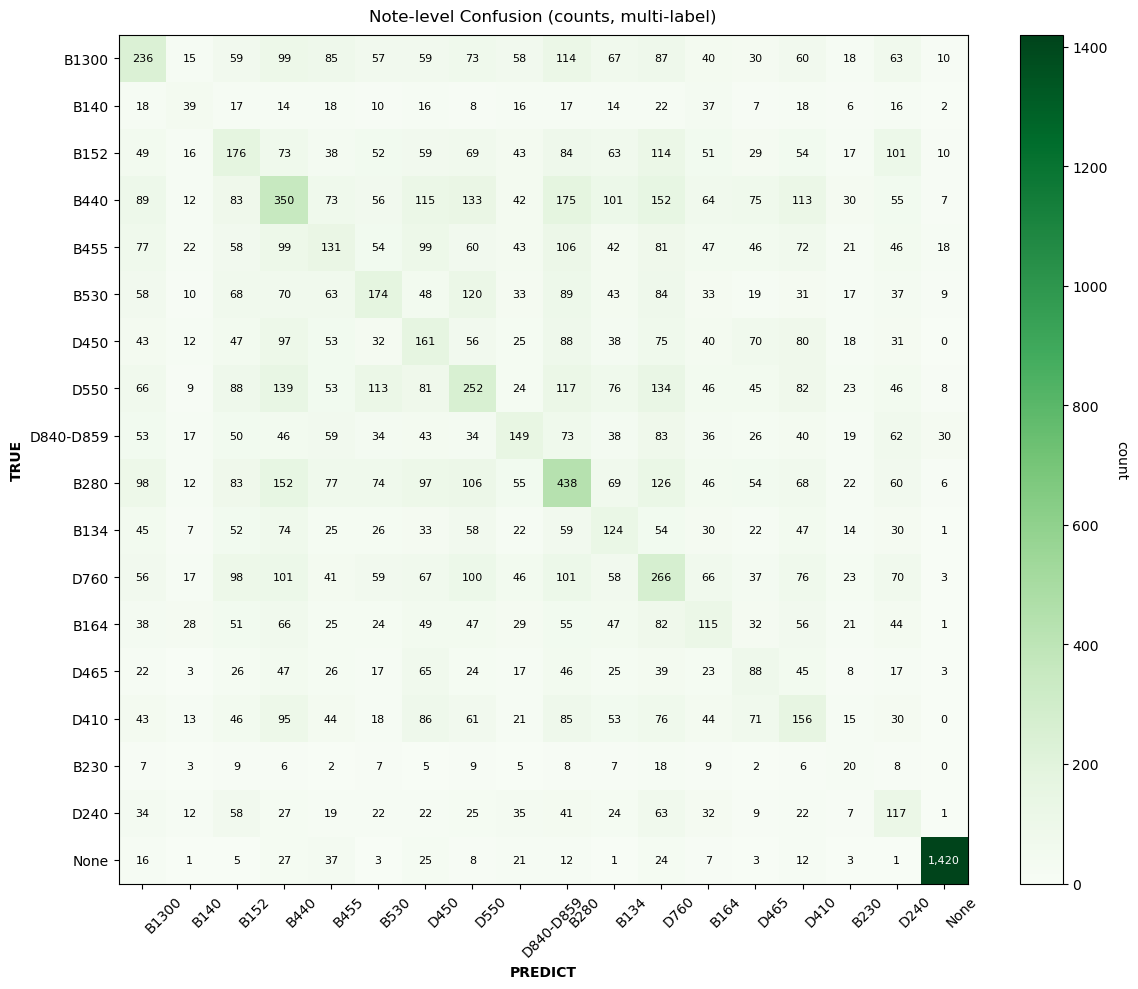

In [17]:
# === NOTE-LEVEL EVALUATION (18 categories) ===

# ---------- config ----------
NOTE_COL_CANDIDATES = ["NotitieID", "NoteID"]   # we'll use whichever exists
PRED_COL_CANDIDATES = ["pred_18", "pred_medroberta_18cats", "pred_gpt_18cats"]
TRUE_COL_CANDIDATES = ["true_18", "labels_18"]

CAT_18 = ['B1300', 'B140', 'B152', 'B440', 'B455', 'B530', 'D450', 'D550', 'D840-D859', 'B280', 'B134', 'D760', 'B164', 'D465', 'D410', 'B230', 'D240', 'None']

# ---------- helpers ----------
def normalize_noteid(x):
    """Make note ids comparable (strip .0, remove underscore suffix)."""
    s = str(x)
    if s.endswith(".0"):
        s = s[:-2]
    if "_" in s:
        s = s.split("_")[0]
    return s

def ensure_list(v):
    """Parse list-like strings to python lists; pass through lists."""
    if isinstance(v, list): 
        return v
    return ast.literal_eval(str(v))

def pick_col(df, candidates, name):
    for c in candidates:
        if c in df.columns:
            return c
    raise KeyError(f"Could not find a {name} column in: {candidates}")

def agg_note(series_of_lists):
    """
    series_of_lists: lists of length 18 (per sentence) for one note.
    Returns an 18-dim note-level vector: OR over first 17 dims; recompute None.
    """
    A = np.array([ensure_list(x) for x in series_of_lists], dtype=int)
    non_none = A[:, :17].max(axis=0)                   # OR across sentences
    none = int(non_none.sum() == 0)                    # only if nothing else appears
    return np.concatenate([non_none, [none]]).astype(int)

# ---------- get the working columns ----------
note_col = pick_col(df, NOTE_COL_CANDIDATES, "note-id")
pred_col = pick_col(df, PRED_COL_CANDIDATES, "prediction")
true_col = pick_col(df, TRUE_COL_CANDIDATES, "gold/true")

# Normalize note ids
df["_note_id_norm"] = df[note_col].apply(normalize_noteid)

# Make sure pred/true are lists of length 18
df["_pred18"] = df[pred_col].apply(ensure_list)
df["_true18"] = df[true_col].apply(ensure_list)

# ---------- aggregate to note level ----------
note_pred = df.groupby("_note_id_norm")["_pred18"].apply(agg_note)
note_true = df.groupby("_note_id_norm")["_true18"].apply(agg_note)

Yp = np.vstack(note_pred.values)
Yt = np.vstack(note_true.values)

print(f"# notes: {Yt.shape[0]}")

# Sanity: supports per category at note level
supports_note = Yt.sum(axis=0)
# print("Note-level supports (per category):")
# for c, s in zip(CAT_18, supports_note):
#     print(f"{c:55s}: {int(s)}")

# ---------- note-level classification report ----------
report_note = classification_report(
    Yt, Yp, target_names=CAT_18, zero_division=0, output_dict=True
)
df_report_note = pd.DataFrame(report_note).round(2)

# Show and/or save
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
print("\n=== NOTE-LEVEL CLASSIFICATION REPORT (18 cats) ===")
print(df_report_note)

df_report_note.to_csv("note_level_report_18.csv")
np.savez("note_level_labels_18.npz", y_true=Yt, y_pred=Yp)  # handy for later

def multilabel_confusion_counts(Y_true: np.ndarray, Y_pred: np.ndarray) -> np.ndarray:
    L = Y_true.shape[1]
    none_idx = L - 1
    cm = np.zeros((L, L), dtype=int)
    for yt, yp in zip(Y_true, Y_pred):
        Ts = set(np.flatnonzero(yt))
        Ps = set(np.flatnonzero(yp))
        if not Ts:
            Ts = {none_idx}
        if not Ps:
            Ps = {none_idx}
        for t in Ts:
            for p in Ps:
                cm[t, p] += 1
    return cm

def plot_confusion(cm: np.ndarray, labels, title: str, out_png: str, fmt: str = "{:,}"):
    fig, ax = plt.subplots(figsize=(14, 10))
    im = ax.imshow(cm, interpolation="nearest", cmap="Greens")
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.set_ylabel("count" if fmt == "{:,}" else "row fraction",
                       rotation=270, labelpad=15)

    ax.set_xticks(range(len(labels))); ax.set_yticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="left"); ax.set_yticklabels(labels)
    ax.set_xlabel("PREDICT", fontweight="bold"); ax.set_ylabel("TRUE", fontweight="bold")
    ax.set_title(title, fontsize=12, pad=10)

    thresh = cm.max() * 0.65 if cm.size and np.isfinite(cm).all() else 0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, fmt.format(cm[i, j]),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",
                    fontsize=8)

    fig.tight_layout()
    plt.show()   # <---- this shows it inline in Jupyter
    fig.savefig(out_png, dpi=180)
    plt.close(fig)

# build counts CM
cm_note = multilabel_confusion_counts(Yt, Yp)

# show it directly as a DataFrame in output
df_cm_note = pd.DataFrame(cm_note, index=CAT_18, columns=CAT_18)
# print("\n=== NOTE-LEVEL CONFUSION MATRIX (counts) ===")
# print(df_cm_note)

# save CSV
df_cm_note.to_csv("note_level_confusion_18.csv")

# plot counts heatmap
plot_confusion(cm_note, CAT_18,
               title="Note-level Confusion (counts, multi-label)",
               out_png="note_level_confusion_18.png",
               fmt="{:,}")

In [ ]:
def needs_validation(row):
    pred = row['pred_medroberta_18cats']
    # Check indices 9 to 16 (Python indexing: 9:17)
    return any(pred[i] == 1 for i in range(9, 17))

df_validation = df_comb[df_comb.apply(needs_validation, axis=1)].copy()

print(f"✅ Selected {len(df_validation)} sentences for medical validation.")

# Optional: save to CSV
df_validation.to_csv('sentences_for_medical_validation.csv', index=False)

In [11]:
df = df_comb

cat = ['ADM', 'ATT', 'BER', 'ENR', 'ETN', 'FAC', 'INS', 'MBW', 'STM', 'none']
pred_cat = ['pred_ADM', 'pred_ATT', 'pred_BER', 'pred_ENR', 'pred_ETN', 'pred_FAC', 'pred_INS', 'pred_MBW', 'pred_STM', 'pred_none']


# for column in cat + pred_cat:
#     df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0).astype(int)

df[cat] = pd.DataFrame(df.true_10.tolist(), index= df.index)
df[pred_cat] = pd.DataFrame(df.pred_10.tolist(), index= df.index)

# y_true = df[cat].values
# y_pred = df[pred_cat].values

# #mcm = multilabel_confusion_matrix(y_true, y_pred)
# np.set_printoptions(threshold=np.inf)

df_cm = pd.DataFrame(0, index=cat, columns=cat)

for i in range(len(cat)):
    fneg = df.loc[df[cat[i]].apply(lambda x: x == 1) & df[pred_cat[i]].apply(lambda x: x == 0)]
    tp = df.loc[df[cat[i]].apply(lambda x: x == 1) & df[pred_cat[i]].apply(lambda x: x == 1)]
    fpos = df.loc[df[cat[i]].apply(lambda x: x == 0) & df[pred_cat[i]].apply(lambda x: x == 1)]
    #fpos
    for j in range(len(cat)):
        if i == j:
            df_cm.at[cat[i], cat[i]] = len(tp[tp[pred_cat[j]]==1])
            continue
        df_cm.at[cat[i], cat[j]] = len(fneg[fneg[pred_cat[j]]==1])


df_cm.columns = pd.MultiIndex.from_tuples([('PREDICT', col) for col in df_cm.columns])
df_cm.index = pd.MultiIndex.from_tuples([('TRUE', idx) for idx in df_cm.index])

# df_cm.style.set_properties(**{'text-align': 'center'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])]).background_gradient(cmap='Greens')

styled_cm = df_cm.style.set_properties(**{
    'text-align': 'center'
}).set_table_styles([
    dict(selector='th.col_heading.level0', props=[('text-align', 'center')]),
    dict(selector='th.row_heading.level0', props=[('text-align', 'center'), ('transform', 'rotate(270deg)'), ('vertical-align', 'middle')]),
    dict(selector='th.row_heading.level1', props=[('text-align', 'right')])
]).background_gradient(cmap='Greens')

print(df_report_icf)
styled_cm                                                                                                                                      
                                                                                 
# df_cm.style.background_gradient(cmap='Greens')

               ADM    ATT     BER     ENR     ETN     FAC     INS     MBW  \
precision     0.88   0.90    0.66    0.83    0.64    0.62    0.58    0.81   
recall        0.45   0.23    0.42    0.54    0.49    0.60    0.20    0.60   
f1-score      0.59   0.37    0.51    0.66    0.55    0.61    0.29    0.69   
support    1063.00  82.00  331.00  413.00  640.00  362.00  382.00  341.00   

              STM      none  micro avg  macro avg  weighted avg  samples avg  
precision    0.80      0.95       0.94       0.77          0.93         0.94  
recall       0.60      0.98       0.93       0.51          0.93         0.94  
f1-score     0.69      0.97       0.93       0.59          0.93         0.94  
support    348.00  33769.00   37731.00   37731.00      37731.00     37731.00  


In [36]:
df = df_comb

cat = ['ADM', 'ATT', 'BER', 'ENR', 'ETN', 'FAC', 'INS', 'MBW', 'STM', 'none']
pred_cat = ['pred_ADM', 'pred_ATT', 'pred_BER', 'pred_ENR', 'pred_ETN', 'pred_FAC', 'pred_INS', 'pred_MBW', 'pred_STM', 'pred_none']


# for column in cat + pred_cat:
#     df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0).astype(int)

df[cat] = pd.DataFrame(df.true_10.tolist(), index= df.index)
df[pred_cat] = pd.DataFrame(df.pred_10.tolist(), index= df.index)

y_true = df[cat].values
y_pred = df[pred_cat].values

att_index = cat.index('ATT')
enr_index = cat.index('ENR')

mismatch_indices = np.where((y_true[:, att_index] == 1) & (y_pred[:, enr_index] == 1))[0]

examples = df.iloc[mismatch_indices]

print(examples['true_10'])
print(examples['pred_10'])



525      [0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
1114     [1, 1, 0, 1, 0, 0, 0, 0, 0, 0]
2075     [1, 1, 0, 1, 0, 0, 0, 0, 0, 0]
15705    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
20508    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
23354    [1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
30174    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
30459    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
Name: true_10, dtype: object
525      [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
1114     [0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
2075     [0, 1, 0, 1, 0, 0, 0, 0, 1, 0]
15705    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
20508    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
23354    [0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
30174    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
30459    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
Name: pred_10, dtype: object


In [ ]:
###### USER TO UPDATE ######

# PROVIDE LABEL NAMES
cat = ['ADM', 'ATT', 'BER', 'ENR', 'ETN', 'FAC', 'INS', 'MBW', 'STM', 'none']
rows = ['ADM', 'ATT', 'BER', 'ENR', 'ETN', 'FAC', 'INS', 'MBW', 'STM', 'none']

pred_cat = ['pred_ADM', 'pred_ATT', 'pred_BER', 'pred_ENR', 'pred_ETN', 'pred_FAC', 'pred_INS', 'pred_MBW', 'pred_STM', 'pred_none']

############################

df[cat] = pd.DataFrame(icf_true)
df[pred_cat] = pd.DataFrame(icf_pred)

# CREATE EMPTY CONFUSION MATRIX WITH COLUMNS & ROWS
df2 = pd.DataFrame(index=rows, columns=cat)

df_cm = df2.fillna(value = 0)

for i in range(len(cat)):
    fneg = df.loc[df[cat[i]].apply(lambda x: x == 1) & df[pred_cat[i]].apply(lambda x: x == 0)]
    tp = df.loc[df[cat[i]].apply(lambda x: x == 1) & df[pred_cat[i]].apply(lambda x: x == 1)]
    fpos = df.loc[df[cat[i]].apply(lambda x: x == 0) & df[pred_cat[i]].apply(lambda x: x == 1)]
    #fpos
    for j in range(len(cat)):
        if i == j:
            df_cm.at[cat[j], cat[i]] = len(tp[tp[pred_cat[j]]==1])
            continue
#         print("cat[i]:", cat[i])
#         print("cat[j]:", cat[j])
#         print("pred_cat[i]:",pred_cat[i])
#         print(f"df_cm {[cat[i]]} {[cat[j]]} = {len(fneg[fneg[pred_cat[j]]==1])}")
        df_cm.at[cat[j], cat[i]] = len(fneg[fneg[pred_cat[j]]==1])

df_cm
# print("MULTI-LABEL PREDICTIONS output_file:", combined_pred_file)
df_cm.style.background_gradient(cmap='Greens')
# Greys, Blues, Reds, Greens, Oranges, Purples, GnBu, BuGn, YlOrBr

In [25]:
# ERROR EXPORT
df_red = df_comb[['text', 'true_10', 'pred_10', 'source_dataset', 'pad_sen_id', 'confidence_jenia_M3_ft2']]

categories = ['ADM', 'ATT', 'BER', 'ENR', 'ETN', 'FAC', 'INS', 'MBW', 'STM', 'none']

fp_df_dict = {category: pd.DataFrame(columns=['text', 'true_10', 'pred_10']) for category in categories}
fn_df_dict = {category: pd.DataFrame(columns=['text', 'true_10', 'pred_10']) for category in categories}
tp_df_dict = {category: pd.DataFrame(columns=['text', 'true_10', 'pred_10']) for category in categories}

def compute_fp_fn(df, true_col, pred_col, source_col, sen_id, conf, categories):
    for index, row in df.iterrows():
        true_labels = row[true_col]
        pred_labels = row[pred_col]
        text = row['text']
        source = row[source_col]
        sent_id = row[sen_id]
        confidence = row[conf]


        for idx, category in enumerate(categories):
            #print(idx, category)
            if true_labels[idx] == 0 and pred_labels[idx] == 1:
                fp_df_dict[category] = pd.concat([fp_df_dict[category], pd.DataFrame([{'text':text, 
                                                                                       'true_10':true_labels, 
                                                                                       'pred_10':pred_labels, 
                                                                                       'source_dataset':source, 
                                                                                       'pad_sen_id':sent_id,
                                                                                       'sent_len': len(text),
                                                                                       'confidence':confidence[idx]}])], ignore_index=True)
            elif true_labels[idx] == 1 and pred_labels[idx] == 0:
                fn_df_dict[category] = pd.concat([fn_df_dict[category], pd.DataFrame([{'text':text, 
                                                                                       'true_10':true_labels, 
                                                                                       'pred_10':pred_labels, 
                                                                                       'source_dataset':source, 
                                                                                       'pad_sen_id':sent_id, 
                                                                                       'sent_len': len(text), 
                                                                                       'confidence':confidence[idx]}])], ignore_index=True)
            elif true_labels[idx] == 1 and pred_labels[idx] == 1:
                tp_df_dict[category] = pd.concat([tp_df_dict[category], pd.DataFrame([{'text':text, 
                                                                                       'true_10':true_labels, 
                                                                                       'pred_10':pred_labels, 
                                                                                       'source_dataset':source, 
                                                                                       'pad_sen_id':sent_id, 
                                                                                       'sent_len': len(text), 
                                                                                       'confidence':confidence[idx]}])], ignore_index=True)


compute_fp_fn(df_red, 'true_10', 'pred_10', 'source_dataset', 'pad_sen_id', 'confidence_jenia_M3_ft2', categories)

for category in categories:
    fp_df_dict[category].to_csv(f'fp_{category}.csv', index=False, sep=';')
    fn_df_dict[category].to_csv(f'fn_{category}.csv', index=False, sep=';')
    tp_df_dict[category].to_csv(f'tp_{category}.csv', index=False, sep=';')

In [65]:
#fn_df_dict['ADM']


stats_dict = {}
for category, df in fn_df_dict.items():
    stats = {
        'max':df['confidence'].max(),
        'min':df['sent_len'].min(),
        'median':df['sent_len'].median(),
        'avg':df['sent_len'].mean()}
    stats_dict[category] = stats

stats_df = pd.DataFrame(stats_dict).transpose()


stats_df

,max,min,median,avg
ADM,679.0,2.0,71.0,82.212500
ATT,285.0,15.0,67.5,85.869565
BER,452.0,6.0,86.5,103.535354
ENR,841.0,3.0,74.0,100.561290
ETN,1805.0,1.0,64.0,99.693227
FAC,475.0,1.0,57.0,95.712871
INS,717.0,4.0,79.0,106.083019
MBW,1051.0,3.0,74.0,111.891892
STM,739.0,4.0,64.0,96.964602
none,1197.0,4.0,68.0,98.091371


In [70]:
df_comb

categories=['ADM', 'ATT', 'BER', 'ENR', 'ETN', 'FAC', 'INS', 'MBW', 'STM', 'O']

cat_indices = {category: index for index, category in enumerate(categories)}

for cat, index in cat_indices.items():
    #df_comb[cat] = df_comb['pred_jenia_M3_ft2'].apply(lambda x: x[index]) # Predictions only!
    df_comb[f'{cat}_confidence'] = df_comb['confidence_jenia_M3_ft'].apply(lambda x: x[index]) # Predictions only!

,pad_sen_id,year,NotitieID,batch,annotator,source_dataset,background_sent,target_sent,text_raw,text,...,pred_ADM,pred_ATT,pred_BER,pred_ENR,pred_ETN,pred_FAC,pred_INS,pred_MBW,pred_STM,pred_none
0,0100001_0000,2020,0100001,fysiotherapie,edwin,ellemijn,False,False,categorie,categorie,...,0,0,0,0,0,0,0,0,0,1
1,0100001_0001,2020,0100001,fysiotherapie,edwin,ellemijn,False,False,Anders,Anders,...,0,0,0,0,0,0,0,0,0,1
2,0100002_0000,2020,0100002,dietetiek,edwin,ellemijn,False,False,),),...,0,0,0,0,0,0,0,0,0,1
3,0100002_0001,2020,0100002,dietetiek,edwin,ellemijn,False,False,valuatie,valuatie,...,0,0,0,0,0,0,0,0,0,1
4,0100002_0002,2020,0100002,dietetiek,edwin,ellemijn,False,False,/,/,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37350,423659267_0125,2020,423659267,ze_batch1,hinke,jenia_test,False,False,dr. Polyukhovych Beleid - TTE na weekend herha...,dr. Polyukhovych Beleid - TTE na weekend herha...,...,0,0,0,0,0,0,0,0,0,1
37351,423659267_0126,2020,423659267,ze_batch1,hinke,jenia_test,False,False,Morgen lab controle - Inplannen PCI na weekend...,Morgen lab controle - Inplannen PCI na weekend...,...,0,0,0,0,0,0,0,0,0,1
37352,423659267_0127,2020,423659267,ze_batch1,hinke,jenia_test,False,False,Na weekend .,Na weekend .,...,0,0,0,0,0,0,0,0,0,1
37353,423659267_0128,2020,423659267,ze_batch1,hinke,jenia_test,False,False,@ - Alvast aanmelden device MDO :,@ - Alvast aanmelden device MDO :,...,0,0,0,0,0,0,0,0,0,1
